## Exploratory Data Analysis on the train df

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [2]:
#importing our data and viewing the first five columns

df = pd.read_csv(r"C:\Users\ASUS\Downloads\datafestafrica-ml-hackathon\Data\train.csv")
df.head(5)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [3]:
#cheking percentage of missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Entry_id - 0%
age - 0%
pay_schedule - 0%
home_owner - 0%
income - 0%
months_employed - 0%
years_employed - 0%
current_address_year - 0%
personal_account_m - 0%
personal_account_y - 0%
has_debt - 0%
amount_requested - 0%
risk_score - 0%
risk_score_2 - 0%
risk_score_3 - 0%
risk_score_4 - 0%
risk_score_5 - 0%
ext_quality_score - 0%
ext_quality_score_2 - 0%
inquiries_last_month - 0%
e_signed - 0%


In [6]:
df["Entry_id"].is_unique

False

In [8]:
# Number of duplicated entries
df["Entry_id"].duplicated().sum()

6

In [10]:
#looking through our data for wrong entries

print(df.apply(lambda col: col.unique()))

Entry_id                [7629673, 5335819, 8492423, 7948313, 4297036, ...
age                     [40, 33, 21, 26, 43, 51, 34, 56, 24, 50, 61, 2...
pay_schedule                   [bi-weekly, semi-monthly, weekly, monthly]
home_owner                                                         [1, 0]
income                  [3135, 3590, 2303, 2795, 5000, 3055, 3877, 355...
months_employed                    [0, 6, 5, 9, 10, 1, 4, 2, 8, 3, 7, 11]
years_employed          [3, 5, 4, 2, 6, 8, 1, 10, 0, 7, 9, 12, 11, 14,...
current_address_year           [3, 2, 8, 4, 1, 11, 6, 5, 0, 10, 7, 9, 12]
personal_account_m                 [6, 2, 1, 4, 3, 5, 9, 8, 7, 11, 0, 10]
personal_account_y      [2, 8, 7, 6, 1, 4, 0, 3, 5, 9, 10, 11, 12, 14,...
has_debt                                                           [1, 0]
amount_requested        [550, 1100, 600, 800, 900, 1000, 500, 400, 120...
risk_score              [36200, 53850, 74850, 50800, 69100, 59750, 555...
risk_score_2            [0.737398319, 

In [11]:
#seeing what our data looks like 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [12]:
df.shape

(12516, 21)

In [13]:
df.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


In [14]:
#checking data type of each column

print(df.dtypes)

Entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object


In [15]:
#correlation check
df.corr()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
Entry_id,1.000000,0.001674,-0.002344,-0.013507,0.014661,-0.008881,-0.002746,0.001546,-0.011615,0.009282,-0.002112,-0.003692,0.006861,-0.017663,0.004465,-0.002202,0.004144,0.002180,-0.003409,-0.004522
age,0.001674,1.000000,0.133687,0.173751,-0.101626,0.181711,0.146980,-0.009237,0.043375,-0.039205,0.088569,0.169701,-0.019758,0.113279,0.064497,0.099304,0.034433,0.037925,0.046362,-0.084775
home_owner,-0.002344,0.133687,1.000000,0.147731,0.018484,0.023364,0.177688,0.010494,-0.044700,-0.086891,0.039704,0.110235,-0.000833,0.047717,-0.147547,-0.085380,0.013117,0.005813,0.014225,-0.054786
income,-0.013507,0.173751,0.147731,1.000000,-0.044470,0.097195,0.048199,0.011379,0.001863,-0.016620,0.296007,0.176333,-0.010499,0.062654,0.002825,0.026979,-0.003207,0.000577,0.049533,0.039160
months_employed,0.014661,-0.101626,0.018484,-0.044470,1.000000,-0.194144,-0.055271,0.207739,-0.023665,-0.004871,-0.043417,-0.041778,0.031067,-0.032631,-0.013331,-0.026016,-0.006963,-0.000484,-0.021979,-0.000714
years_employed,-0.008881,0.181711,0.023364,0.097195,-0.194144,1.000000,0.339631,-0.053152,0.185619,-0.001882,0.094241,0.096123,-0.060066,0.067584,-0.032767,-0.006258,0.009021,0.036350,0.008185,0.009607
current_address_year,-0.002746,0.146980,0.177688,0.048199,-0.055271,0.339631,1.000000,0.081847,0.116587,0.015887,0.067214,0.086974,-0.064426,0.047827,-0.157666,-0.098582,0.003250,0.012006,0.015498,-0.016873
personal_account_m,0.001546,-0.009237,0.010494,0.011379,0.207739,-0.053152,0.081847,1.000000,-0.143268,0.245035,-0.042454,-0.045303,-0.027033,0.021609,-0.060572,-0.031058,-0.028694,-0.012365,-0.018642,-0.088811
personal_account_y,-0.011615,0.043375,-0.044700,0.001863,-0.023665,0.185619,0.116587,-0.143268,1.000000,-0.029645,0.051882,0.013564,0.027299,0.073417,0.013644,0.049019,0.041922,0.038524,0.010592,-0.025547
has_debt,0.009282,-0.039205,-0.086891,-0.016620,-0.004871,-0.001882,0.015887,0.245035,-0.029645,1.000000,-0.008441,-0.029361,-0.038540,0.000377,0.010143,0.009387,-0.022883,-0.006583,0.008539,0.032952


In [16]:
#checking for total missing values
df.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

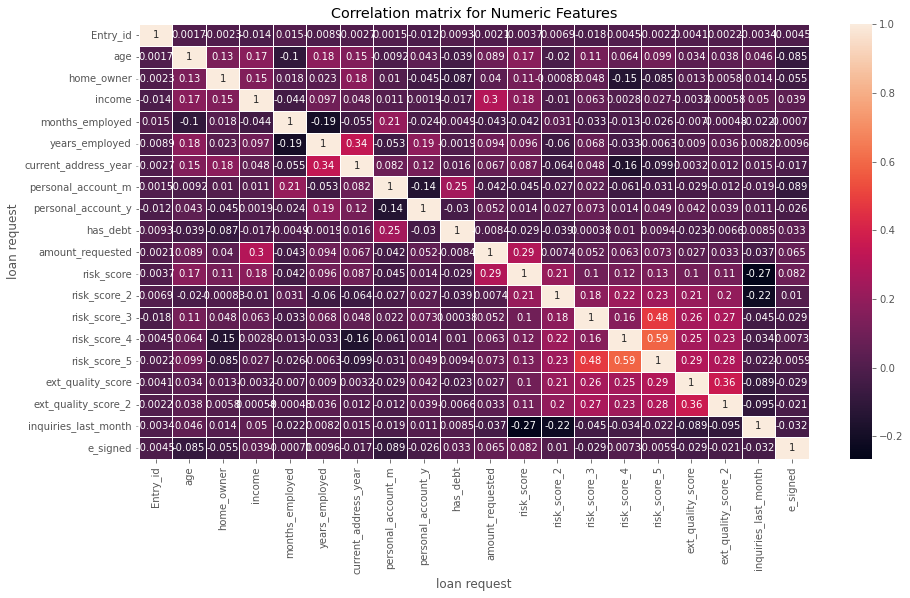

In [17]:
#correlation matrix

ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df.corr(), annot = True, linewidths=0.5)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("loan request")

plt.ylabel("loan request")

plt.show()

In [18]:
df.groupby('has_debt')['income'].mean()

has_debt
0    3703.537500
1    3641.401466
Name: income, dtype: float64

In [19]:
df.groupby('has_debt')['income'].median()

has_debt
0    3282.5
1    3251.0
Name: income, dtype: float64

<AxesSubplot:xlabel='risk_score_5', ylabel='income'>

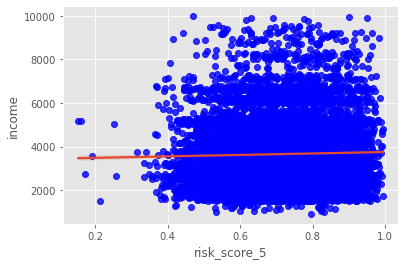

In [20]:
sns.regplot(x="risk_score_5", y="income", data=df,scatter_kws={'color': 'blue'})

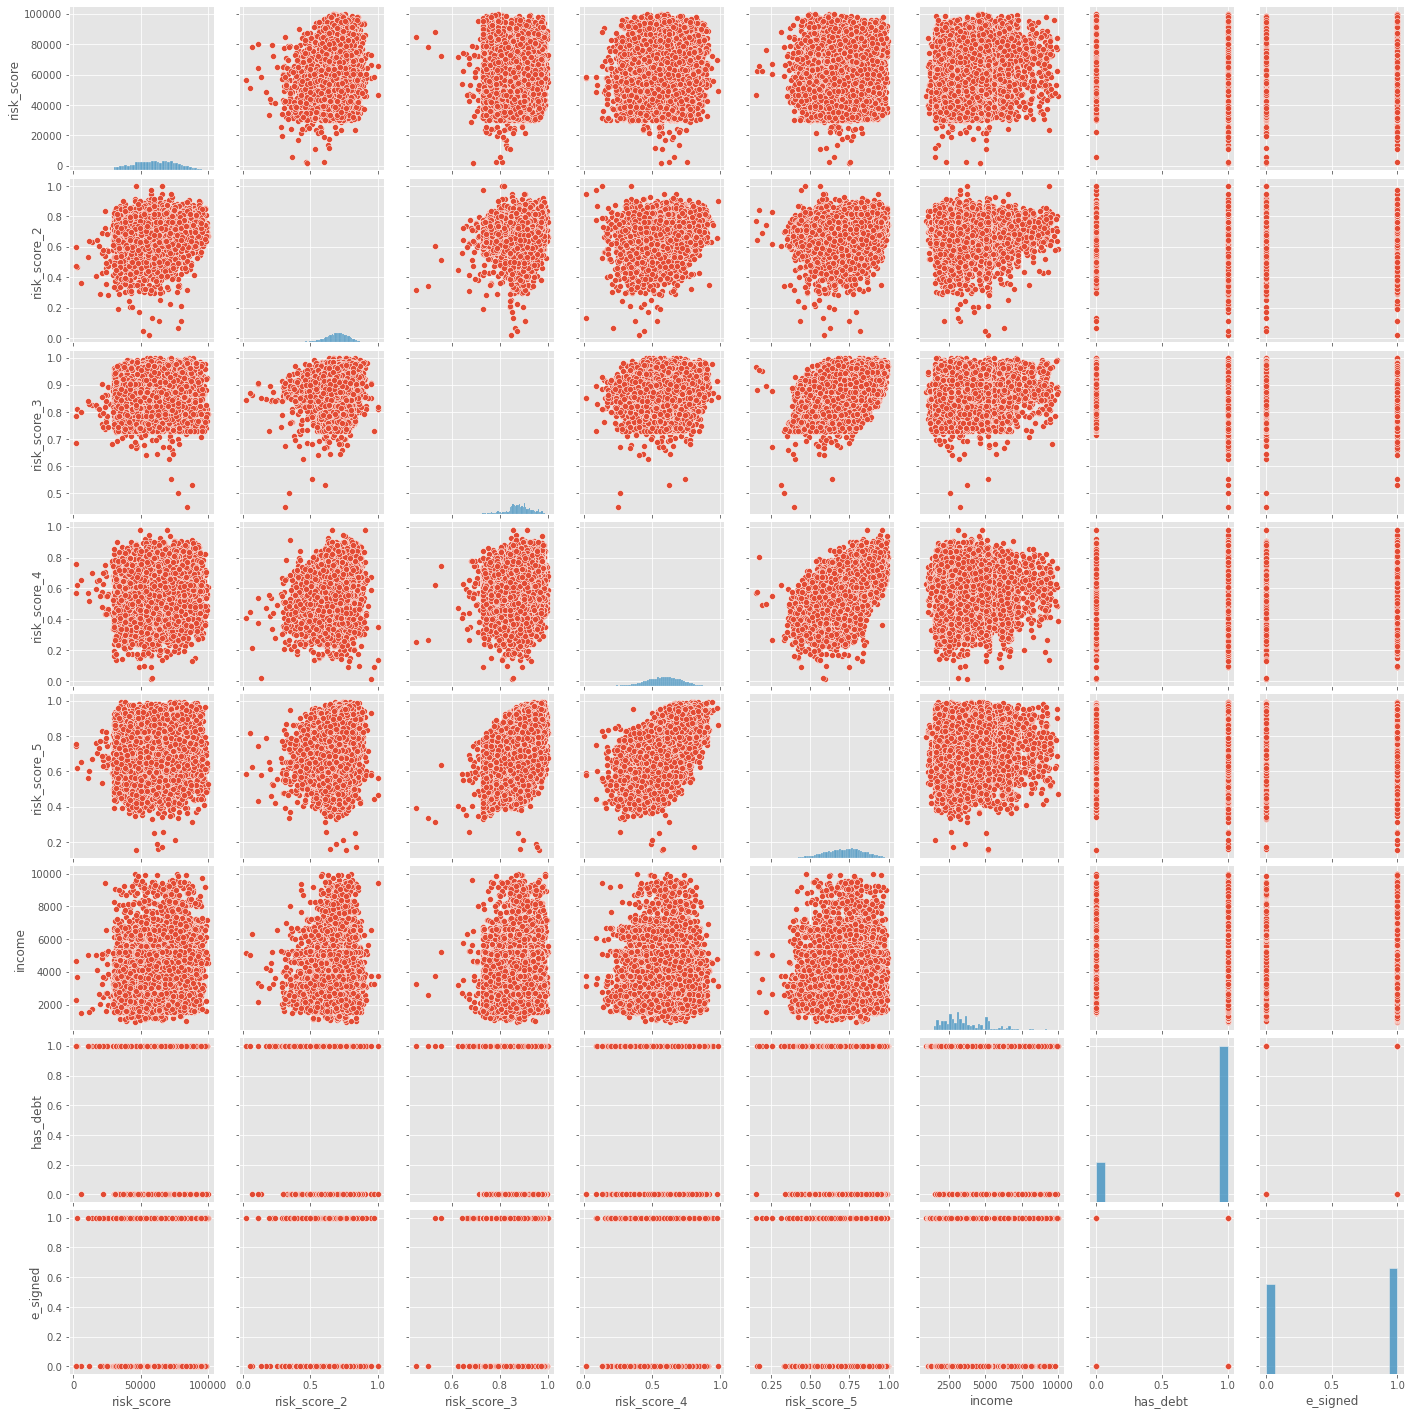

In [21]:
sns.pairplot(data=df, vars=['risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5', 'income','has_debt','e_signed'])
plt.show()

In [22]:
#sns.swarmplot(x="income", y="has_debt", data=df)
#plt.show()

<AxesSubplot:>

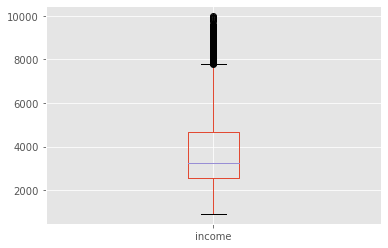

In [23]:
df.boxplot(column=['income'])

In [24]:
df['perc_loan_request']=( df['amount_requested']/ df['income']*100)
print(df['perc_loan_request'])

0        17.543860
1        30.640669
2        26.052974
3        28.622540
4        22.000000
           ...    
12511    14.925373
12512    21.571649
12513    44.692737
12514    15.904573
12515    22.514071
Name: perc_loan_request, Length: 12516, dtype: float64


In [25]:
df.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,perc_loan_request
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,17.543860
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,30.640669
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,26.052974
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,28.622540
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,22.000000


## Data modelling

In [27]:
DATA_DIR:Path = Path("../Data")
train_data_path = DATA_DIR / "train.csv"
test_data_path = DATA_DIR / "test.csv"

train_df = pd.read_csv(r"C:\Users\ASUS\Downloads\datafestafrica-ml-hackathon\Data\train.csv")
test_df = pd.read_csv(r"C:\Users\ASUS\Downloads\datafestafrica-ml-hackathon\Data\test.csv")

print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

Train Data Shape: (12516, 21)
Test Data Shape: (5392, 20)


In [28]:
train_df.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [29]:
test_df.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


In [30]:
normalize_col_name = lambda col_name: col_name.lower()

train_df.columns = [normalize_col_name(col_name) for col_name in train_df.columns]
test_df.columns = [normalize_col_name(col_name) for col_name in test_df.columns]

In [31]:
train_df.pay_schedule = train_df.pay_schedule.str.strip()
test_df.pay_schedule = test_df.pay_schedule.str.strip()

In [32]:
train_df.head(1)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1


In [33]:
test_df.head(1)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.73851,0.881027,0.713423,0.826402,0.73072,0.63072,9


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              5392 non-null   int64  
 1   age                   5392 non-null   int64  
 2   pay_schedule          5392 non-null   object 
 3   home_owner            5392 non-null   int64  
 4   income                5392 non-null   int64  
 5   months_employed       5392 non-null   int64  
 6   years_employed        5392 non-null   int64  
 7   current_address_year  5392 non-null   int64  
 8   personal_account_m    5392 non-null   int64  
 9   personal_account_y    5392 non-null   int64  
 10  has_debt              5392 non-null   int64  
 11  amount_requested      5392 non-null   int64  
 12  risk_score            5392 non-null   int64  
 13  risk_score_2          5392 non-null   float64
 14  risk_score_3          5392 non-null   float64
 15  risk_score_4         

In [36]:
# Percentage of missing records
train_df.isna().sum() / 100

entry_id                0.0
age                     0.0
pay_schedule            0.0
home_owner              0.0
income                  0.0
months_employed         0.0
years_employed          0.0
current_address_year    0.0
personal_account_m      0.0
personal_account_y      0.0
has_debt                0.0
amount_requested        0.0
risk_score              0.0
risk_score_2            0.0
risk_score_3            0.0
risk_score_4            0.0
risk_score_5            0.0
ext_quality_score       0.0
ext_quality_score_2     0.0
inquiries_last_month    0.0
e_signed                0.0
dtype: float64

In [37]:
train_df["entry_id"].is_unique

False

In [38]:
# Number of duplicated entries
train_df["entry_id"].duplicated().sum()

6

In [39]:
duplicates_mask = train_df["entry_id"].duplicated(keep=False)

train_df.loc[duplicates_mask]

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
1487,8156839,37,bi-weekly,0,3020,0,1,7,4,4,...,600,53550,0.728198,0.881015,0.647649,0.742549,0.594076,0.494076,5,1
2488,3903643,41,bi-weekly,0,3035,0,5,0,2,6,...,700,56550,0.574753,0.843991,0.241663,0.516921,0.715925,0.715925,15,1
2626,7450902,57,bi-weekly,0,5295,0,6,4,2,6,...,1700,91500,0.648824,0.789179,0.640210,0.653759,0.694329,0.594329,5,0
4419,5946902,43,semi-monthly,1,4725,3,6,6,5,8,...,1000,59250,0.724398,0.944054,0.444145,0.582691,0.698231,0.698231,3,1
5361,5896278,31,weekly,0,1635,0,6,5,2,2,...,400,73200,0.797840,0.849569,0.687969,0.741433,0.696454,0.696454,6,0
7213,5659209,42,bi-weekly,1,2140,0,2,9,6,4,...,400,56700,0.781691,0.920329,0.481009,0.594963,0.736846,0.536846,6,1
7288,5659209,46,bi-weekly,1,7092,0,3,1,2,3,...,700,64350,0.679462,0.757643,0.550134,0.391500,0.487792,0.587792,6,1
9209,7450902,35,bi-weekly,0,4095,6,2,0,1,3,...,700,57850,0.780735,0.929274,0.625784,0.792078,0.550449,0.550449,5,0
9804,3903643,38,bi-weekly,1,2620,0,2,0,6,4,...,400,67050,0.740419,0.939486,0.684477,0.778170,0.629805,0.729805,9,1
11067,8156839,48,bi-weekly,0,3205,0,2,0,5,3,...,500,53650,0.623579,0.801490,0.621682,0.654174,0.395154,0.495154,4,1


In [40]:
TARGET:str = "e_signed"

In [41]:
train_df[TARGET].value_counts()

1    6766
0    5750
Name: e_signed, dtype: int64

In [42]:
N_SPLITS:int = 5

X = train_df.drop([TARGET], axis="columns")
y = train_df[TARGET]

skf = StratifiedKFold(N_SPLITS, shuffle=True, random_state=45)

for train_idx, test_idx in skf.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    pay_schedule_encoder = LabelEncoder()
    X_train["pay_schedule"] = pay_schedule_encoder.fit_transform(X_train["pay_schedule"])
    X_test["pay_schedule"] = pay_schedule_encoder.transform(X_test["pay_schedule"])
    
    rf_clf = RandomForestClassifier(random_state=45, n_jobs=-1)
    rf_clf.fit(X_train, y_train)
    
    pred = rf_clf.predict(X_test)
    auc_score = roc_auc_score(y_test, pred)
    print("AUC Score:", auc_score)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["pay_schedule"] = pay_schedule_encoder.fit_transform(X_train["pay_schedule"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pay_schedule"] = pay_schedule_encoder.transform(X_test["pay_schedule"])


AUC Score: 0.6266013743497527


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["pay_schedule"] = pay_schedule_encoder.fit_transform(X_train["pay_schedule"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pay_schedule"] = pay_schedule_encoder.transform(X_test["pay_schedule"])


AUC Score: 0.6337019184421094


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["pay_schedule"] = pay_schedule_encoder.fit_transform(X_train["pay_schedule"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pay_schedule"] = pay_schedule_encoder.transform(X_test["pay_schedule"])


AUC Score: 0.6321369581284746


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["pay_schedule"] = pay_schedule_encoder.fit_transform(X_train["pay_schedule"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pay_schedule"] = pay_schedule_encoder.transform(X_test["pay_schedule"])


AUC Score: 0.6148542690960508


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["pay_schedule"] = pay_schedule_encoder.fit_transform(X_train["pay_schedule"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17620\3134949370.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pay_schedule"] = pay_schedule_encoder.transform(X_test["pay_schedule"])


AUC Score: 0.604615829557505


In [43]:
X

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12
2,8492423,21,weekly,0,2303,0,5,8,2,7,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,7100872,31,weekly,0,3015,0,2,1,2,2,0,450,42450,0.643778,0.901396,0.632284,0.856231,0.666399,0.566399,6
12512,9949728,31,monthly,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2
12513,9857590,46,weekly,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9
12514,8708471,42,bi-weekly,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3


In [44]:
train_df["pay_schedule"].value_counts()

bi-weekly       7447
weekly          2627
semi-monthly    1388
monthly         1054
Name: pay_schedule, dtype: int64

In [45]:
test_df["pay_schedule"].value_counts()

bi-weekly       3269
weekly          1069
semi-monthly     616
monthly          438
Name: pay_schedule, dtype: int64

In [46]:
pay_schedule_encoder = LabelEncoder()

X["pay_schedule"] = pay_schedule_encoder.fit_transform(X["pay_schedule"])
test_df["pay_schedule"] = pay_schedule_encoder.transform(test_df["pay_schedule"])
    
rf_clf = RandomForestClassifier(random_state=45, n_jobs=-1)
rf_clf.fit(X, y)

sub_pred = rf_clf.predict(test_df)
sub = pd.DataFrame(test_df["entry_id"])
sub["e_signed"] = sub_pred

In [25]:
sub.to_csv("../submissions/sub_1.csv", index=False)